In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import logging
from funs import *

log("START",level = ("start","Local_Outlier_Factor"))

Local_Outlier_Factor



<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Impot danych z wcześniejszego parsowania w Anomaly_detect_ML</div>
</div>

In [11]:
df_1_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_1_scaled')
df_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_2_scaled')
df_labels = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_2_labels')
df_scaled_result_check_test = pd.read_hdf('parsed_data/IF_segmented_CICIDS2017.h5', key='df_2_scaled_result_check')

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Treming modelu</div>
</div>

In [ ]:
LOF= LocalOutlierFactor(
    n_neighbors=5,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=True,
    n_jobs=None
)
LOF.fit(df_1_scaled)

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Test modelu</div>
</div>

In [ ]:
df_scaled_result_check = test_LOF_model(LOF,df_scaled,df_labels, name="df_test")

In [ ]:
d = DBSCAN(
    eps=0.5,
    min_samples=5,
    metric='euclidean',
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None
)
d.fit(df_1_scaled)

In [ ]:
df_scaled_result_check_DBSCAN = test_DBSCAN_model(LOF,df_scaled,df_labels, name="df_test")

In [13]:
gmm = GaussianMixture(
    n_components=1,  # 1 if training on normal only, or >1 to model clusters
    covariance_type='full',  # also try 'diag' for speed
    random_state=42
)

gmm.fit(df_1_scaled)

,n_components,1
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


GMM
Detection distribution anomaly/normal: 5.0002% / 94.9998%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected: 17112
Normal traffic: 325113


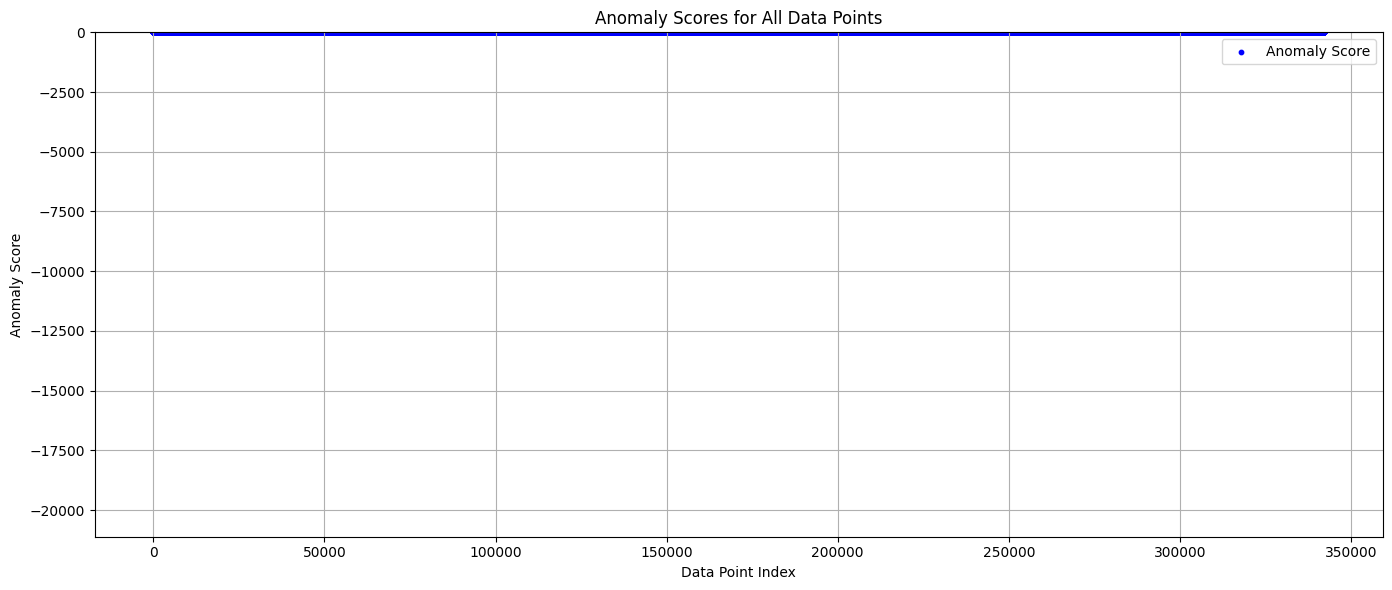

GMM
Number of flows in GMM_Test: 342225
Correct data: 
Real number of anomalies in GMM_Test: 9084
Procentage of anomlys in dataset: 2.6544%
Predicted data: 
Number of DETECTED anomalies in GMM_Test: 17112
Procentage of anomlys in dataset: 5.0002%

Number of correct predictions(TP): 4
Number of wrong predyctions(FP): 17108
Accuracy of predictions: 92.3477%
Sensitivity of predictions: 0.0440%
Precision of predictions: 0.0234%
F - mesure - harmonic-mean of precision and sensitivity: 0.0305%


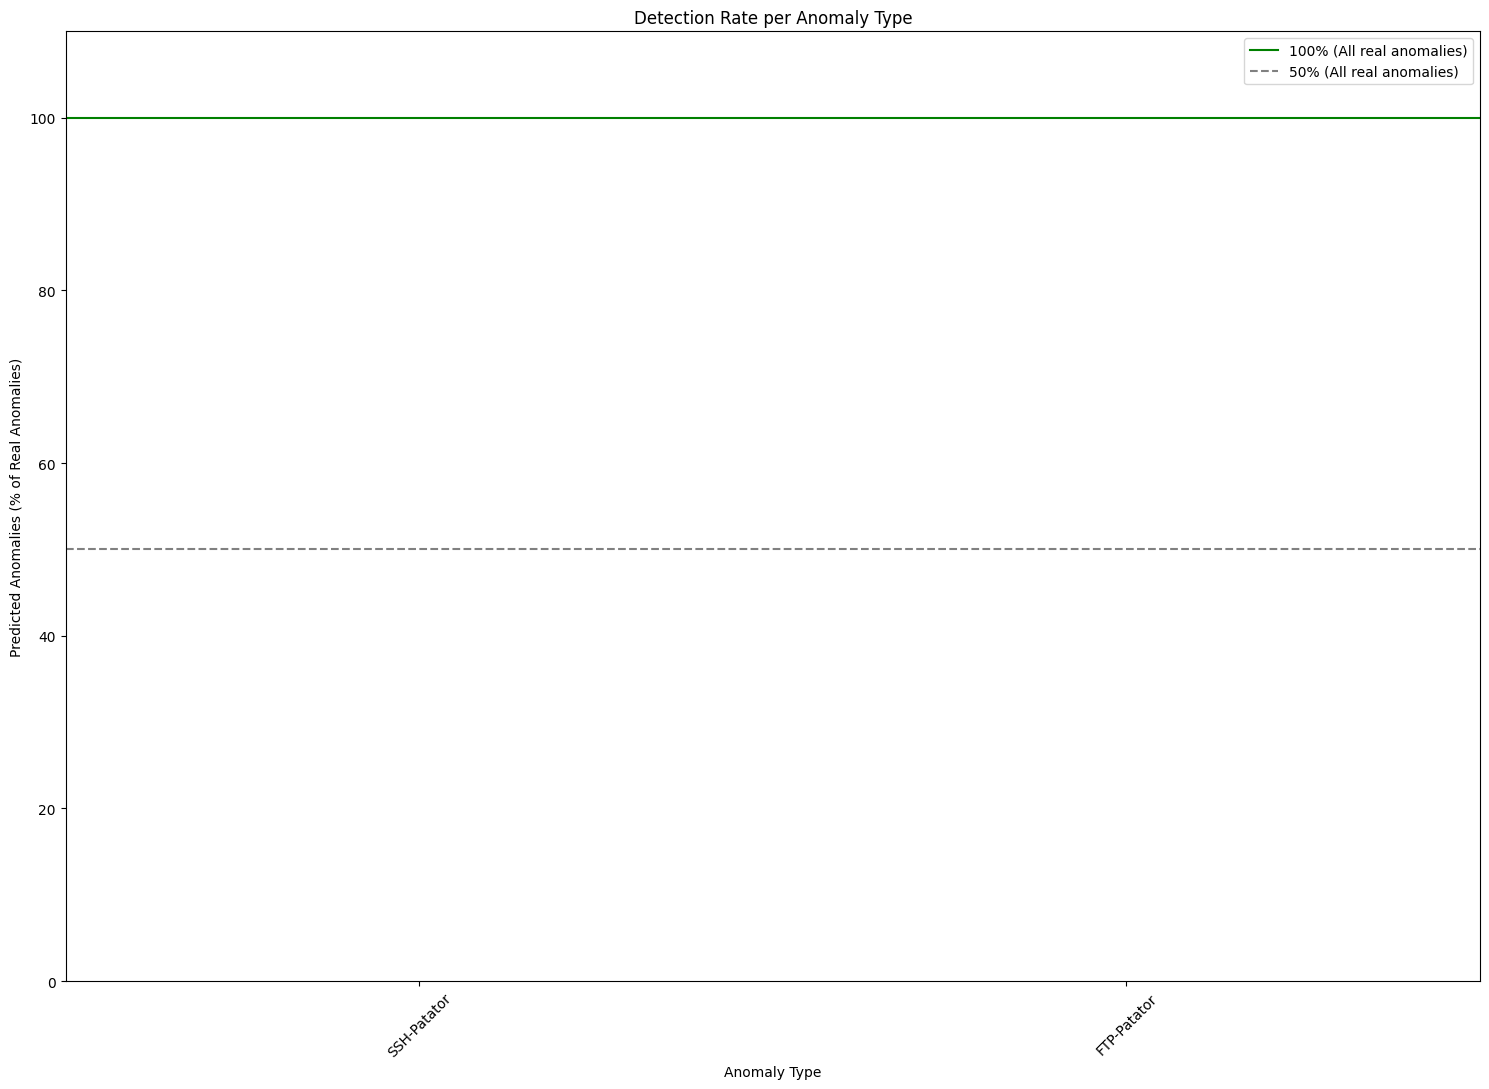

In [14]:
df_scaled_result_check = test_GMM_model(gmm, df_scaled, df_labels, name="GMM_Test")

In [12]:
print(df_1_scaled.columns)
print(df_scaled.columns)

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Repetition num'],
      dtype='object')
Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Repetition num'],
      dtype='object')
